<a href="https://colab.research.google.com/github/kuruvajayanth12/Neural-Networks-and-Deep-Learning/blob/main/Digit_Recognition_Single.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow matplotlib


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [ ]:
# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values (0–255 → 0–1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Add channel dimension (required for CNN)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 digits (0–9)
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.1
)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 43s 48ms/step - accuracy: 0.8849 - loss: 0.3918 - val_accuracy: 0.9805 - val_loss: 0.0628
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.9850 - loss: 0.0482 - val_accuracy: 0.9902 - val_loss: 0.0376
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 40s 48ms/step - accuracy: 0.9900 - loss: 0.0315 - val_accuracy: 0.9893 - val_loss: 0.0338
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.9932 - loss: 0.0214 - val_accuracy: 0.9878 - val_loss: 0.0435
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.9950 - loss: 0.0155 - val_accuracy: 0.9897 - val_loss: 0.0376


In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test accuracy:", test_accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9846 - loss: 0.0440
Test accuracy: 0.9886999726295471


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


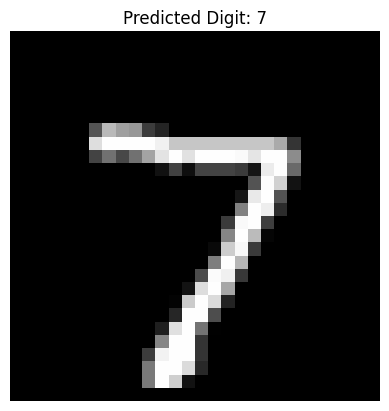

In [ ]:
import numpy as np

# Pick a random test image
index = 0
image = x_test[index]

prediction = model.predict(image[np.newaxis, ...])
predicted_digit = np.argmax(prediction)

plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"Predicted Digit: {predicted_digit}")
plt.axis('off')
plt.show()
